In [1]:
from builtins import range
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
from tqdm import tqdm

In [2]:
# GENETIC CODE
CODE = ["A","T","C","G"]
GENETIC_LEN = len(CODE)


In [3]:
# important functions

def number_2_code(a):
  """
  Converts a numerical array to a DNA string
  Parameters:
    - a: array containing random integers from [0:3]
  """
  return [CODE[i] for i in a]

def distance(a,b):
  """
  Computes the distance between 2 DNA strands
  Parameters:
    - a,b: random integers array
  """
  return sum(i != j for i,j in zip(a,b))

def random_modification(c,prob = 1e-03):
  """
  Modify the given letter with the given probability
  Parameters:
    - c: Letter in the genetic code
  """
  mod_c = np.random.choice(CODE) if np.random.random() < prob else c
  return mod_c


def generate_offspring(parent):
  """
  Generate offspring by modifying some characters in the code
  Parameters:
    - parent: DNA code in the string form
  """
  return [random_modification(c) for c in parent]

In [4]:
# create 3 common ancestors
p_1 = number_2_code(np.random.randint(GENETIC_LEN,size = 1000))
p_2 = number_2_code(np.random.randint(GENETIC_LEN,size = 1000))
p_3 = number_2_code(np.random.randint(GENETIC_LEN,size = 1000))

In [5]:
# simulation parameters
NUM_GENERATIONS = 99
MAX_OFFSPRING_PER_GENERATION = 1000

# initial conditions
current_generation = [p_1,p_2,p_3]

In [6]:
for i in range(NUM_GENERATIONS):
  next_generation = list()
  for parent in current_generation:
    # each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1

    # generate the offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)

  current_generation = next_generation

  # limit the number of the offspring (to prevent this from becoming unfeasible due to exponential growth)
  random.shuffle(current_generation)
  current_generation = current_generation[:MAX_OFFSPRING_PER_GENERATION]
  print(f"[~] Finished creating generation {i+2} / {NUM_GENERATIONS + 1}\n[~] Size: {len(current_generation)}")



[~] Finished creating generation 2 / 100
[~] Size: 7
[~] Finished creating generation 3 / 100
[~] Size: 13
[~] Finished creating generation 4 / 100
[~] Size: 25
[~] Finished creating generation 5 / 100
[~] Size: 45
[~] Finished creating generation 6 / 100
[~] Size: 92
[~] Finished creating generation 7 / 100
[~] Size: 171
[~] Finished creating generation 8 / 100
[~] Size: 330
[~] Finished creating generation 9 / 100
[~] Size: 666
[~] Finished creating generation 10 / 100
[~] Size: 1000
[~] Finished creating generation 11 / 100
[~] Size: 1000
[~] Finished creating generation 12 / 100
[~] Size: 1000
[~] Finished creating generation 13 / 100
[~] Size: 1000
[~] Finished creating generation 14 / 100
[~] Size: 1000
[~] Finished creating generation 15 / 100
[~] Size: 1000
[~] Finished creating generation 16 / 100
[~] Size: 1000
[~] Finished creating generation 17 / 100
[~] Size: 1000
[~] Finished creating generation 18 / 100
[~] Size: 1000
[~] Finished creating generation 19 / 100
[~] Size: 1

In [7]:
# distance matrix where i,j is the distance between points i and j
N = len(current_generation)
dist_matrix = np.zeros((N,N)) # the matrix must of size N x N because we want to compute the distance between each of the N points

for i in tqdm(range(N)):
  for j in range(N):
    if i == j: # identical DNA sequences have a distance of 0
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i,j] = distance(a,b) # compute the distance of the current set of samples
    else:
      dist_matrix[i,j] = dist_matrix[j,i] # the matrix is simetrical

100%|██████████| 1000/1000 [01:11<00:00, 13.92it/s]


In [8]:
dist_array = ssd.squareform(dist_matrix)

# Ward Hierachical Clustering

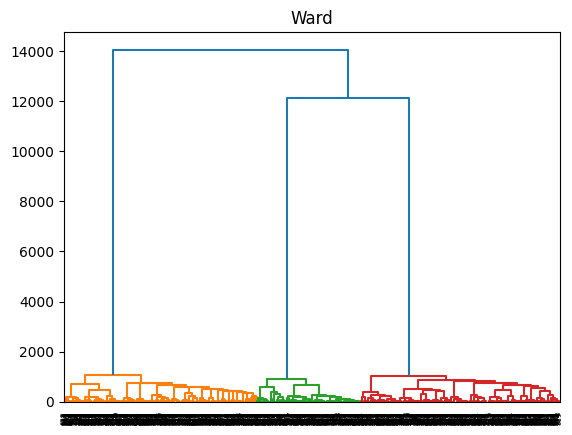

In [9]:
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z)
plt.show()

# Single Hierarchical Clustering

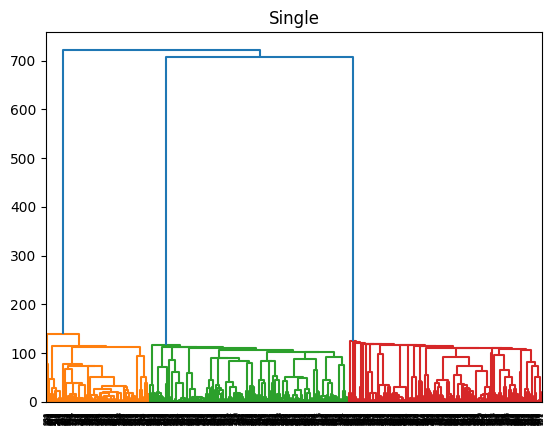

In [10]:
Z = linkage(dist_array, 'single')
plt.title("Single")
dendrogram(Z)
plt.show()

# Complete Hierarchical Clustering

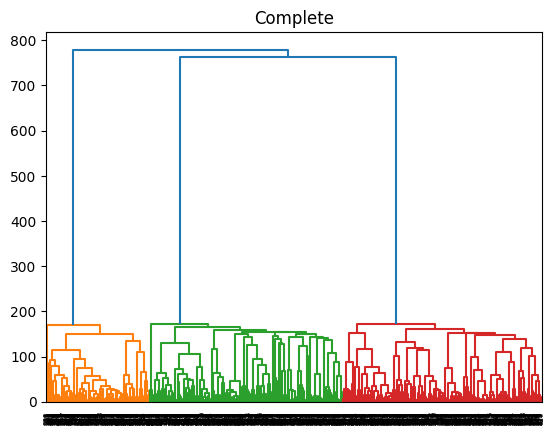

In [11]:
Z = linkage(dist_array, 'complete')
plt.title("Complete")
dendrogram(Z)
plt.show()

# Conclusion
Three natural clusters for each common ancestor.